In [1]:
import sys
sys.path.append("..")
from utils.dataset import FerDataset

import numpy as np

import torch
import torch.nn as nn
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class LeNet5(nn.Module):
    """ LeNet customized to FER."""
    
    def __init__(self):
        super(LeNet5, self).__init__()
        
        self.convnet = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=(5, 5)),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2), stride=2),
            nn.Conv2d(6, 16, kernel_size=(5, 5)),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2), stride=2),
            nn.Conv2d(16, 120, kernel_size=(5, 5)),
            nn.ReLU(),
            nn.Conv2d(120, 240, kernel_size=(5, 5)),
            nn.ReLU())

        self.fc = nn.Sequential(
            nn.Linear(240, 84),
            nn.ReLU(),
            nn.Linear(84, 10))

    def forward(self, x):
        x = self.convnet(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

In [3]:
dataset = FerDataset(base_path='/Users/lennard/data/project/fer',
                     data='ferplus',
                     mode='train',
                     label='ferplus_votes')
dataloader = DataLoader(dataset, batch_size=24, shuffle=True, num_workers=0)
net = LeNet5()
log_softmax = nn.LogSoftmax(dim=-1)
criterion = nn.KLDivLoss(size_average=False)
optimizer = torch.optim.SGD(net.parameters(), lr=0.0001, momentum=0.9)

In [4]:
x_batch, y_batch = next(iter(dataloader))
losses = []
for i in range(1000):
    optimizer.zero_grad()
    logits = net(x_batch)
    log_probs = log_softmax(logits)
    loss = criterion(log_probs, y_batch)
    losses.append(float(loss))
    loss.backward()
    optimizer.step()
    print(i, end='\r')

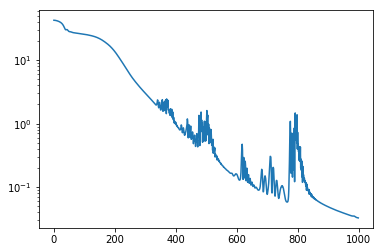

In [6]:
plt.plot(losses)
plt.yscale('log')